# Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [126]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [127]:
import numpy as np
import pandas as pd
from scipy import stats
from random import random
import seaborn as sns
import matplotlib as plt

%matplotlib inline

## Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

______________________________________________

Load naming data. 

`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [128]:
namingData = readNamingData('term.txt')

For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:

## Demo 5: Import speaker demographic information

> Most speakers' age _(integer)_ and gender _(M/F)_ information was recorded.

______________________________________________

Load speaker information.

`speakerInfo` is a hierarchical dictionary organized as follows:

**language &rarr; speaker &rarr; (age, gender)**

In [129]:
speakerInfo = readSpeakerData('spkr-lsas.txt')

### Data Manipulation

In [130]:
speaker_num_naming_data = []

for val in namingData: 
    speaker_num_naming_data.append(len(list(namingData[val].keys())))

In [131]:
len(speaker_num_naming_data)

110

In [132]:
speaker_num_gender_data = []

for val in speakerInfo:
    speaker_num_gender_data.append(len(list(speakerInfo[val].keys())))

In [133]:
len(speaker_num_gender_data)

110

In [134]:
[print(n,g) for n,g in zip(speaker_num_naming_data,speaker_num_gender_data) if n !=g]

24 25
24 25
6 8
26 25
25 24


[None, None, None, None, None]

In [135]:
indices = [n+1 for n in range(len(speaker_num_naming_data)) if speaker_num_naming_data[n] !=speaker_num_gender_data[n] ]
indices

[62, 88, 93, 95, 97]

### Data Cleaning

In [136]:
cleaned_speaker_num_naming_data = []
cleaned_naming_data = []

for val in namingData: 
    if val not in indices: 
        cleaned_speaker_num_naming_data.append(len(list(namingData[val].keys())))

In [137]:
len(cleaned_speaker_num_naming_data)
len(namingData)

110

In [138]:
myDict1 = {key:val for key, val in namingData.items() if key != 62}
myDict2 = {key:val for key, val in myDict1.items() if key != 88}
myDict3 = {key:val for key, val in myDict2.items() if key != 93}
myDict4 = {key:val for key, val in myDict3.items() if key != 95}
cleaned_naming_data = {key:val for key, val in myDict4.items() if key != 97}

In [139]:
len(cleaned_naming_data)

105

In [140]:
unique_colour_list = [] #contains the number of unique colours named by each speaker

for val in cleaned_naming_data: 
    for s in cleaned_naming_data[val]:
        unique_colour_list.append(len(list(set(list(cleaned_naming_data[val][s].values())))))

In [141]:
len(unique_colour_list)

2511

In [142]:
Dict1 = {key:val for key, val in speakerInfo.items() if key != 62}
Dict2 = {key:val for key, val in Dict1.items() if key != 88}
Dict3 = {key:val for key, val in Dict2.items() if key != 93}
Dict4 = {key:val for key, val in Dict3.items() if key != 95}
cleaned_gender_data = {key:val for key, val in Dict4.items() if key != 97}

In [143]:
cleaned_speaker_num_gender_data = []

for val in speakerInfo: 
    if val not in indices: 
        cleaned_speaker_num_gender_data.append(len(list(speakerInfo[val].keys())))

In [144]:
len(cleaned_gender_data)

105

In [145]:
cleaned_speaker_num_gender_data == cleaned_speaker_num_naming_data

True

### Creating the Dataframe 

In [146]:
gender_age = []
gender = []
age = []


speaker = [] # list of total number of speakers in each language 

for val in cleaned_gender_data:
    #print(val)
    speaker.append(len(list(cleaned_gender_data[val].keys())))
    for s in cleaned_gender_data[val]:
        gender_age.append((cleaned_gender_data[val][s][0][1],cleaned_gender_data[val][s][0][0]))
        gender.append(cleaned_gender_data[val][s][0][1])
        age.append(int(cleaned_gender_data[val][s][0][0]))
        

In [147]:
s = np.arange(1,111)
s= [str(i) for i in s] 
speaker_col = []
#print(s)

nested = [list(v*(s[i],)) for v, i in zip(speaker, range(len(s)))]
#nested

In [148]:
language = [ int(item) for elem in nested for item in elem] 

In [149]:
len(language)

2511

In [150]:
full_df = pd.DataFrame(list(zip(language, gender, age, gender_age, unique_colour_list)), columns = ['language', 'gender', 'age', 'gender_age','unique' ])

In [151]:
clean = full_df[full_df.gender != '*']
clean = clean[clean.gender != 'X']
clean.gender[clean.gender == 'f'] = "F"
    
clean['gender'].describe()

count     2506
unique       2
top          M
freq      1287
Name: gender, dtype: object

In [152]:
clean.head(5)

,language,gender,age,gender_age,unique
0,1,M,90,"(M, 90)",6
1,1,M,26,"(M, 26)",7
2,1,M,38,"(M, 38)",6
3,1,M,35,"(M, 35)",6
4,1,M,80,"(M, 80)",7


In [153]:
clean[clean['language']==9]

,language,gender,age,gender_age,unique
192,9,F,0,"(F, 0)",8
193,9,F,0,"(F, 0)",8
194,9,F,0,"(F, 0)",5
195,9,F,0,"(F, 0)",9
196,9,F,0,"(F, 0)",9
197,9,F,0,"(F, 0)",7
198,9,F,0,"(F, 0)",6
199,9,F,0,"(F, 0)",6
200,9,F,0,"(F, 0)",6
201,9,F,0,"(F, 0)",6


In [154]:
clean.dtypes

language       int64
gender        object
age            int64
gender_age    object
unique         int64
dtype: object

In [155]:
clean[['unique', 'age']].describe()

,unique,age
count,2506.000000,2506.000000
mean,8.360335,35.569034
std,3.539998,16.377076
min,2.000000,0.000000
25%,6.000000,23.000000
50%,8.000000,33.000000
75%,10.000000,46.000000
max,32.000000,91.000000


### Data Visualization

#### The Gender Count Difference across 105 Languages 

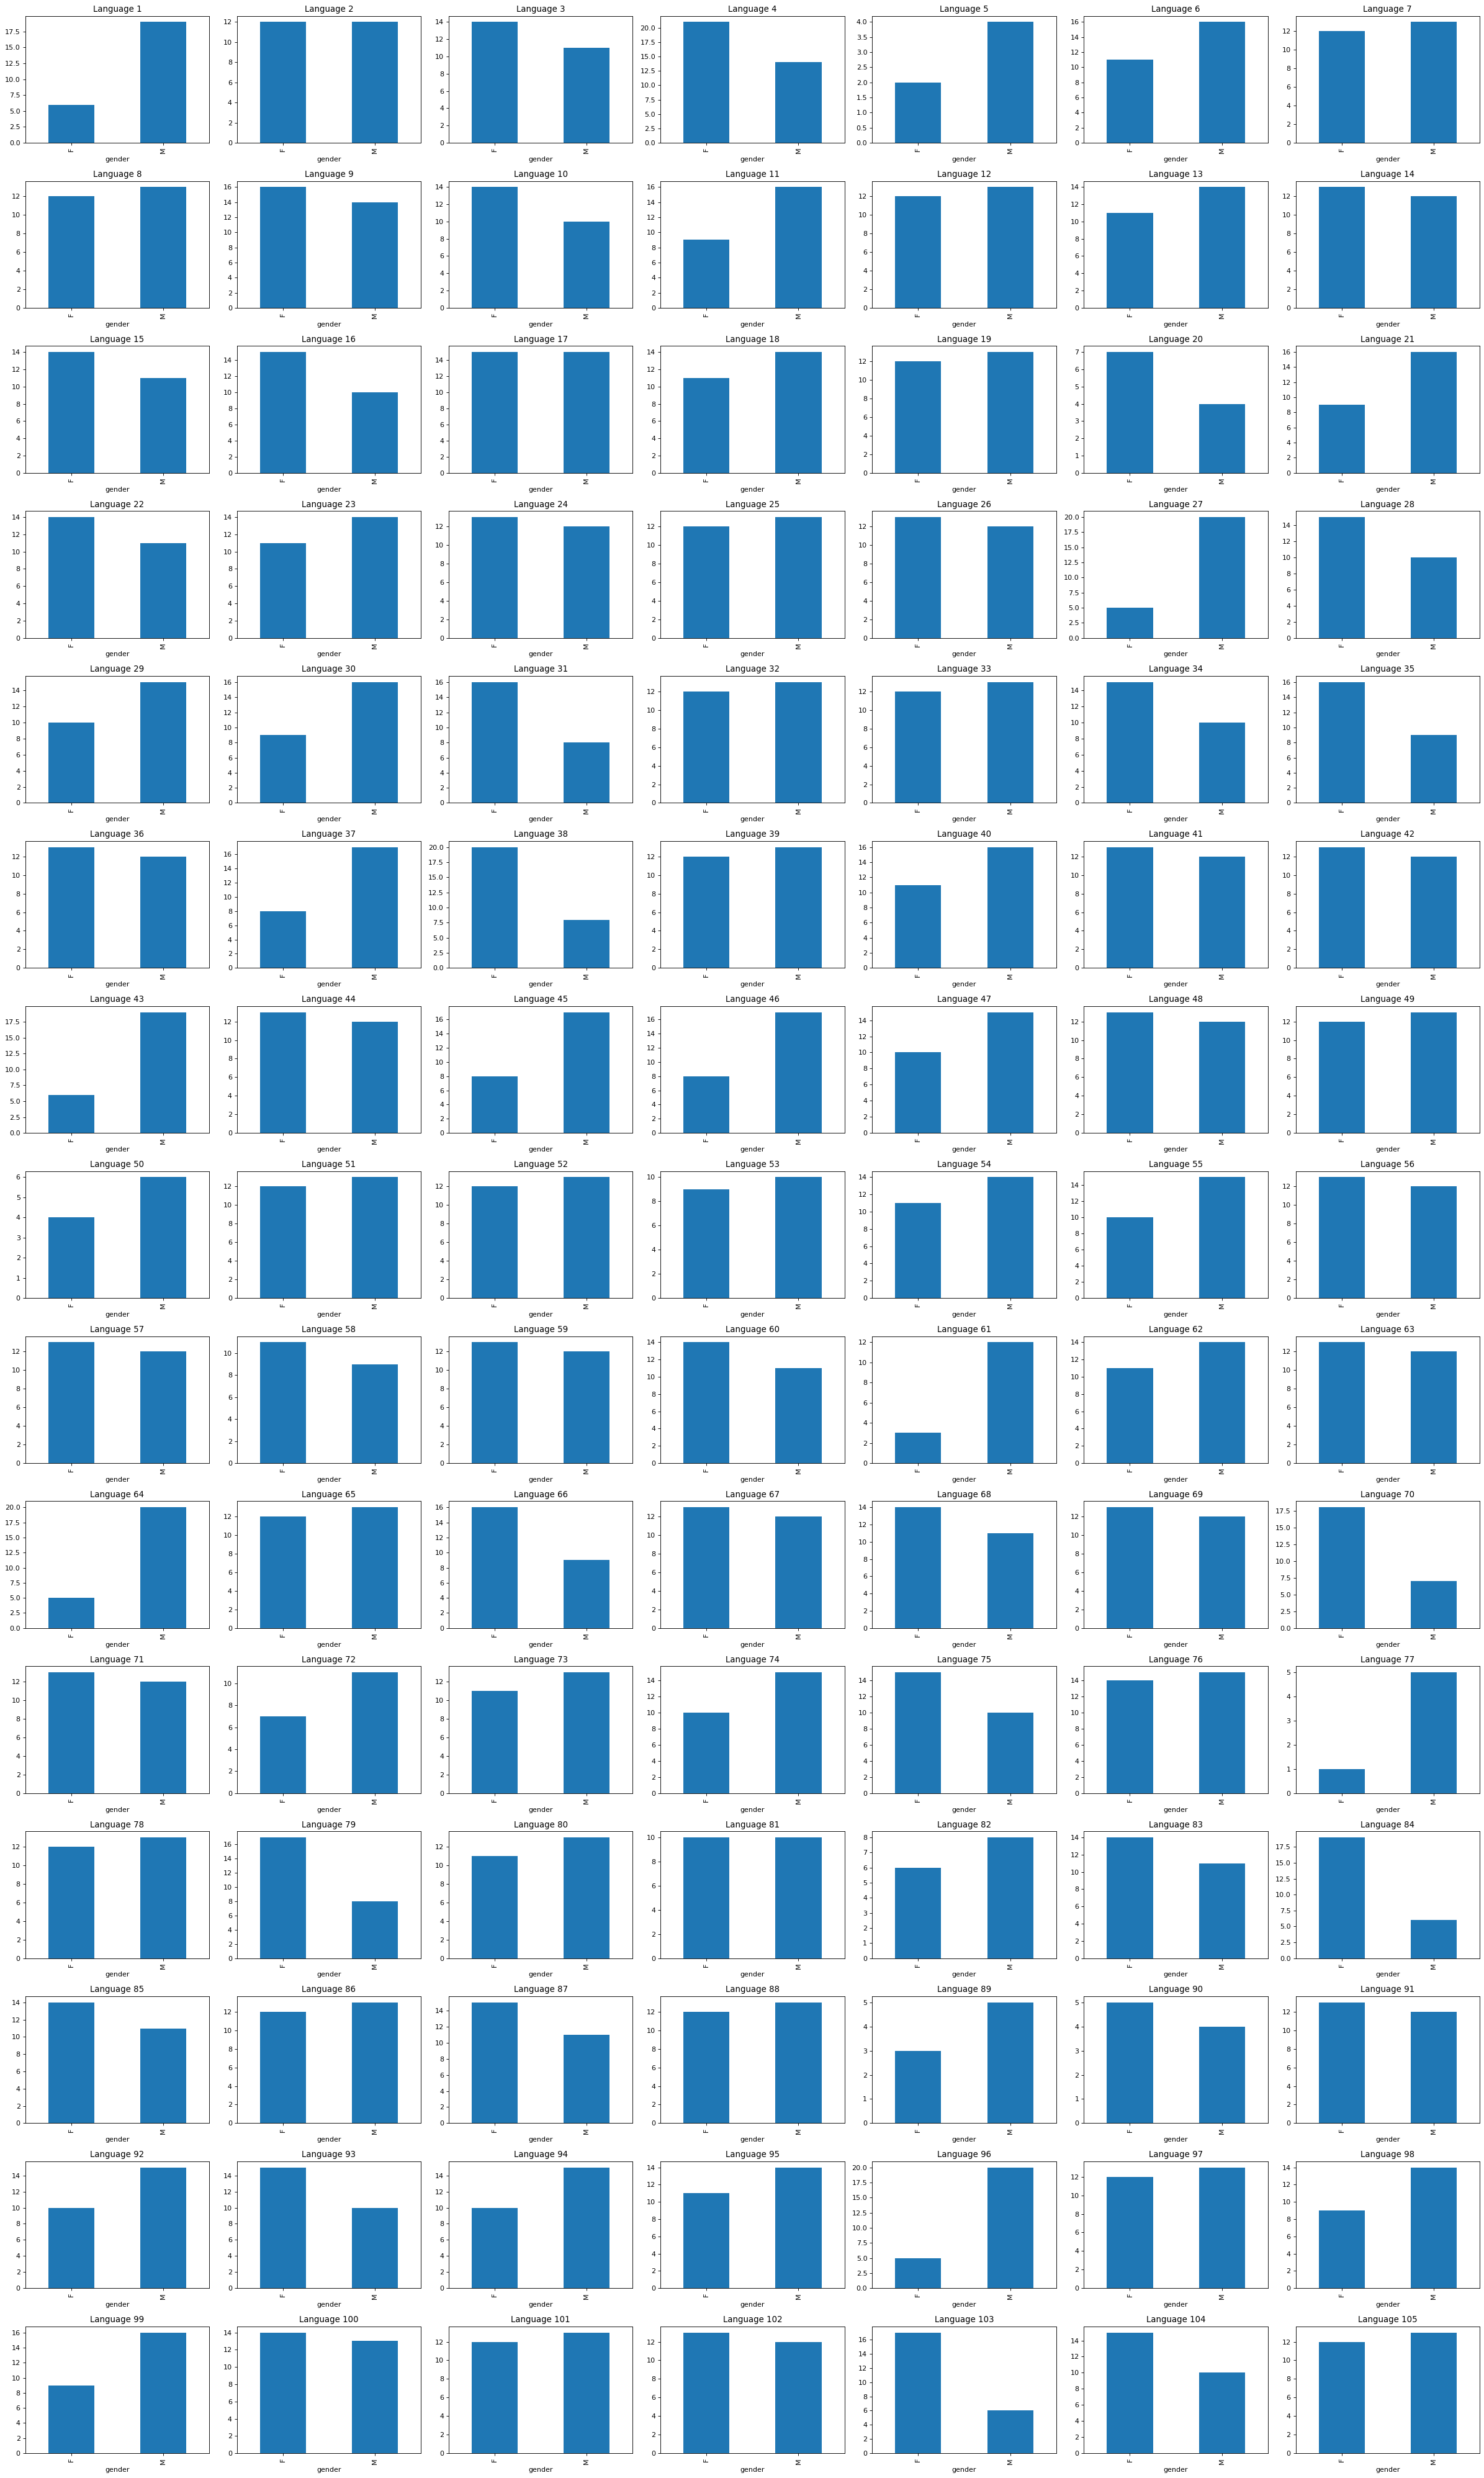

In [165]:
# find how the number of each gender varies across the languages  

fig = plt.figure(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the languages
for s in range(1,106):    
    lang = clean[clean['language']==s]
    plt.subplot(15,7,s);
    plt.title('s'+str(s));
    lang.groupby('gender').size().plot(kind='bar')
    plt.tight_layout()
    # Specify title of the plot by language index
    plt.title('Language '+str(s));
    


#### Regression Analysis : Age vs Unique Colour Names across 105 languages 

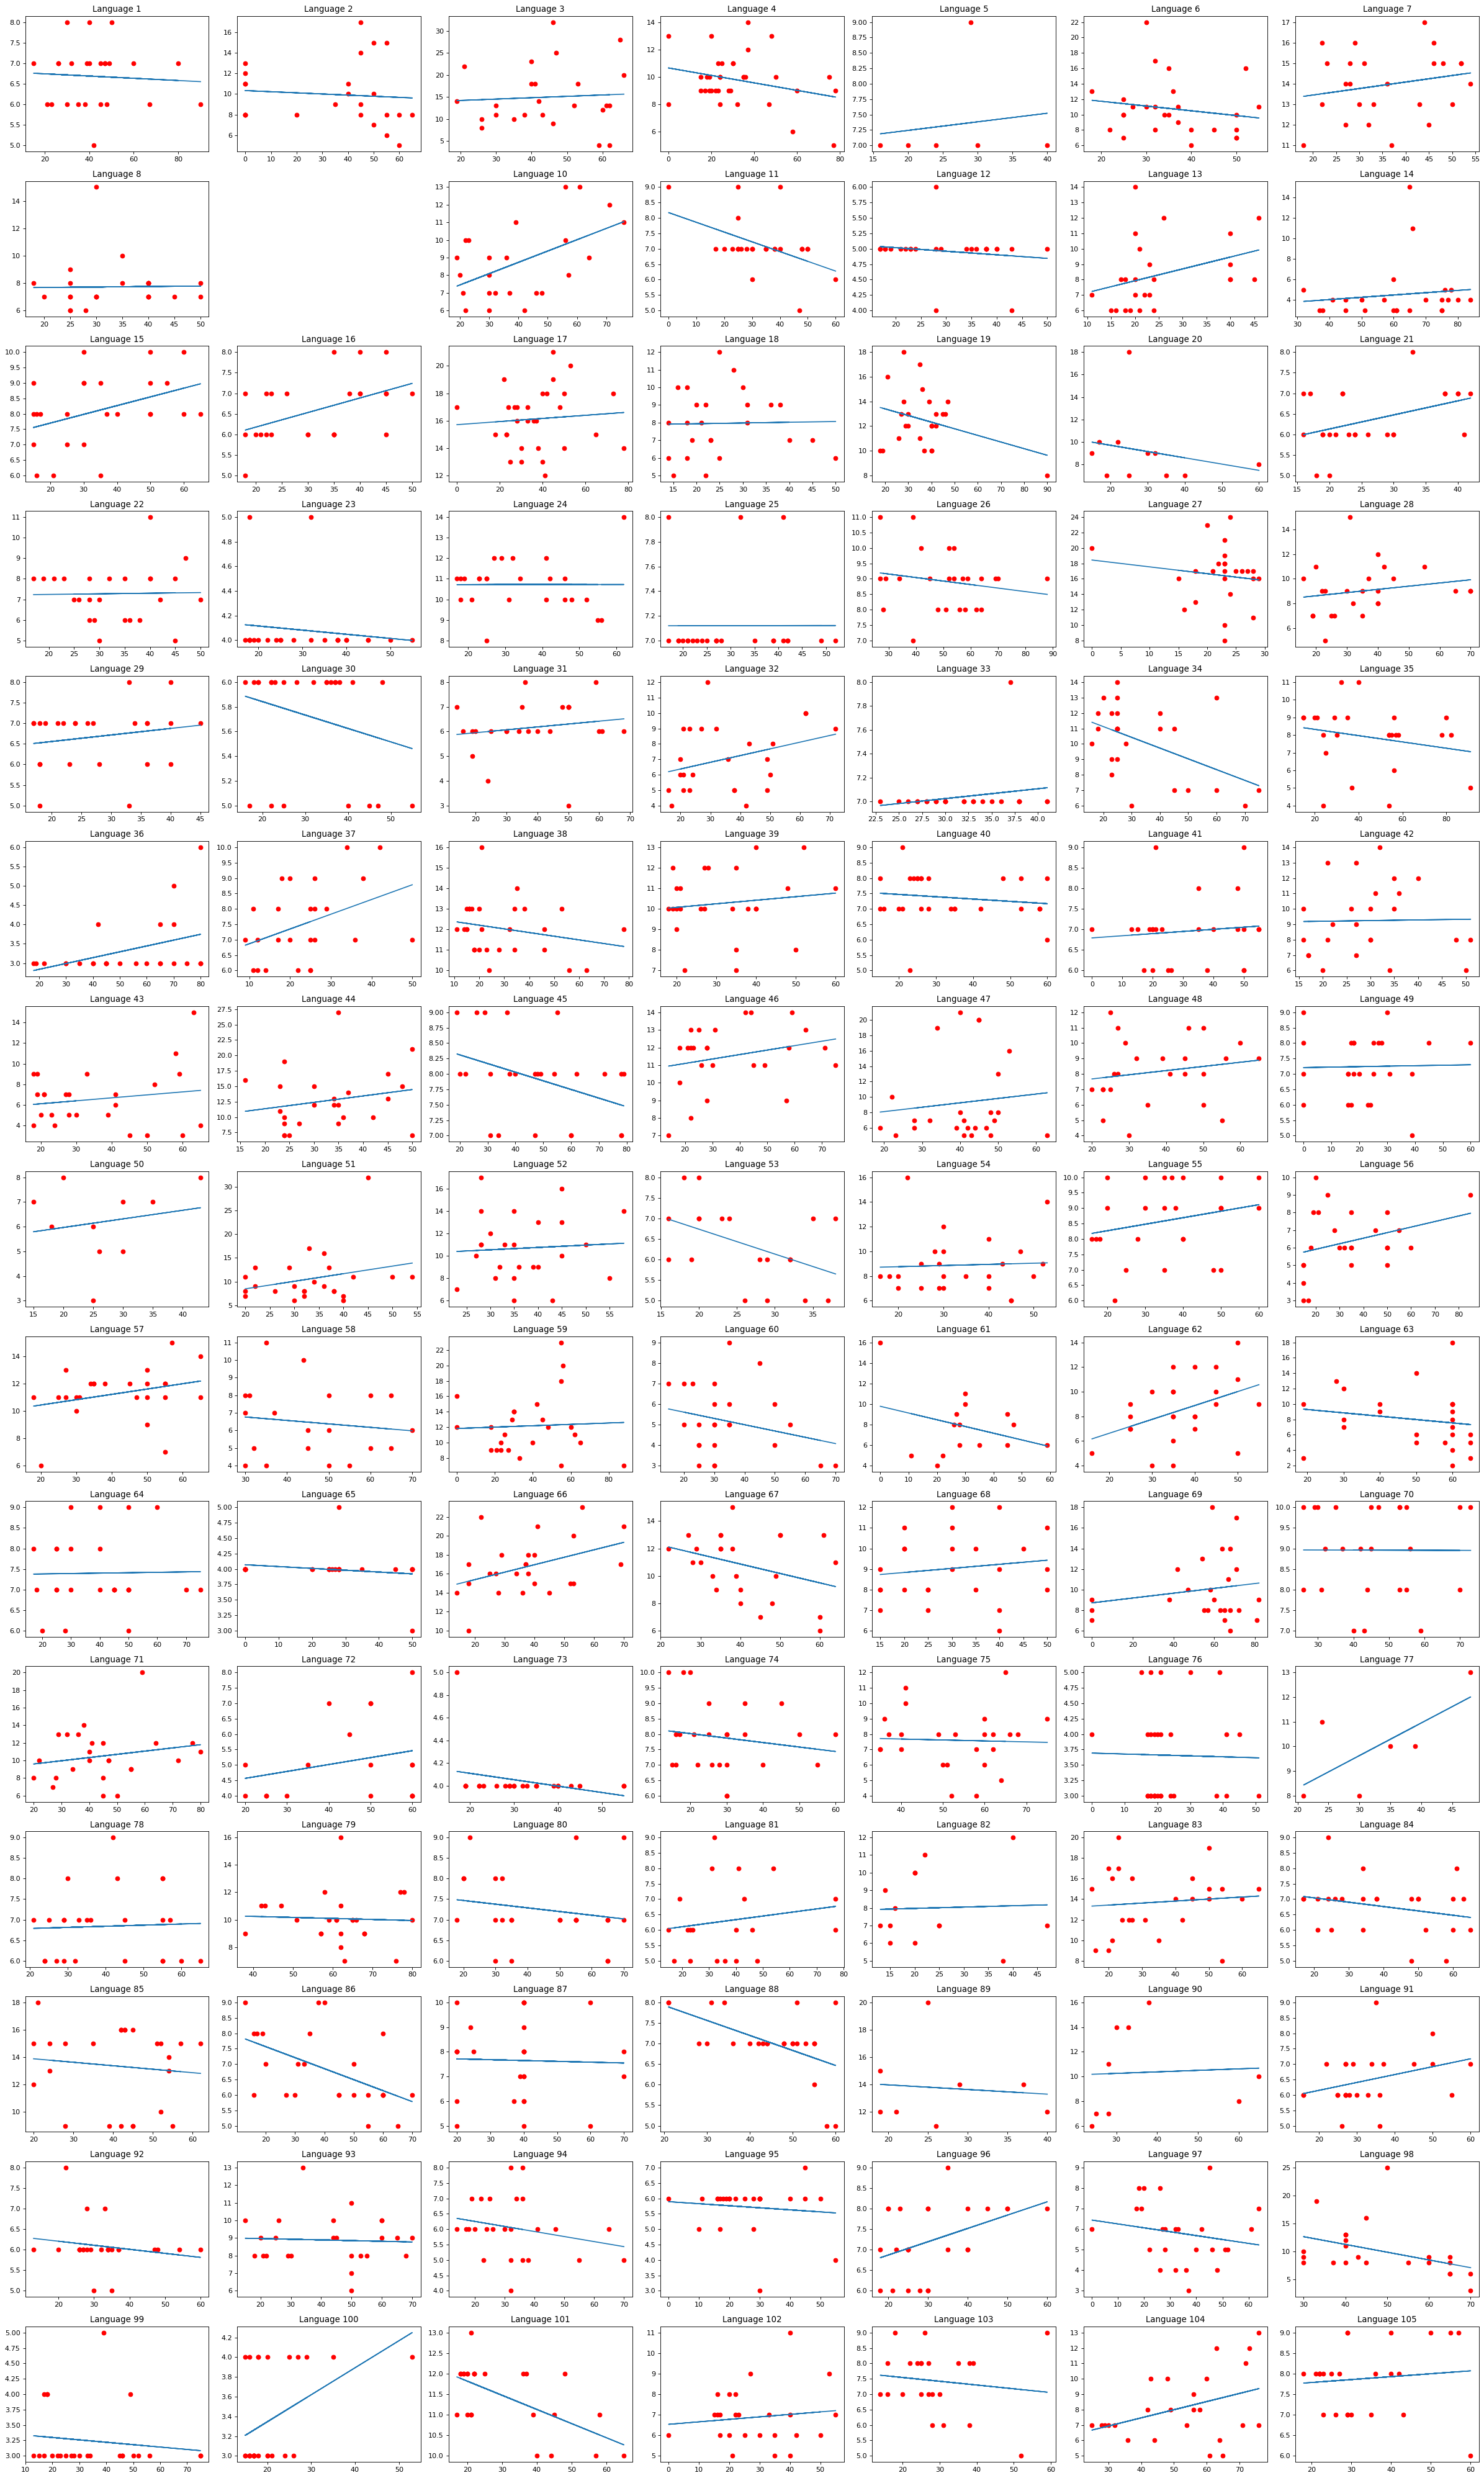

In [166]:
#create subplot for each language and identify the trends with linear regression lines across 110 languages
fig = plt.figure(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the languages
for s in range(1,106): 
    if s !=9: 
        lang = clean[clean['language']==s]
        lang.dropna(inplace=True)

        #age vs unique across the langauges , gender as a the filler , get language based age and unique from the cleaned data 
        x = lang.age
        y = lang.unique

        m, b = np.polyfit(x, y, 1) # m = slope, b=intercept.

        # Create a subplot for this language
        plt.subplot(15,7,s);
        plt.title('s'+str(s));

        # Scatter plot age vs unique with gender as a marker

        plt.plot(x, y, 'ro')
                 #, marker = "." ,markersize = 1);

        # Juxtapose the fitted line onto this scatter plot
        plt.plot(x, m*x + b) 
        plt.tight_layout()

        # Specify title of the plot by language index
        plt.title('Language '+str(s));
        
        #9 is removed as the age value for it is 0 for all entries 


Age and Unique Color Names

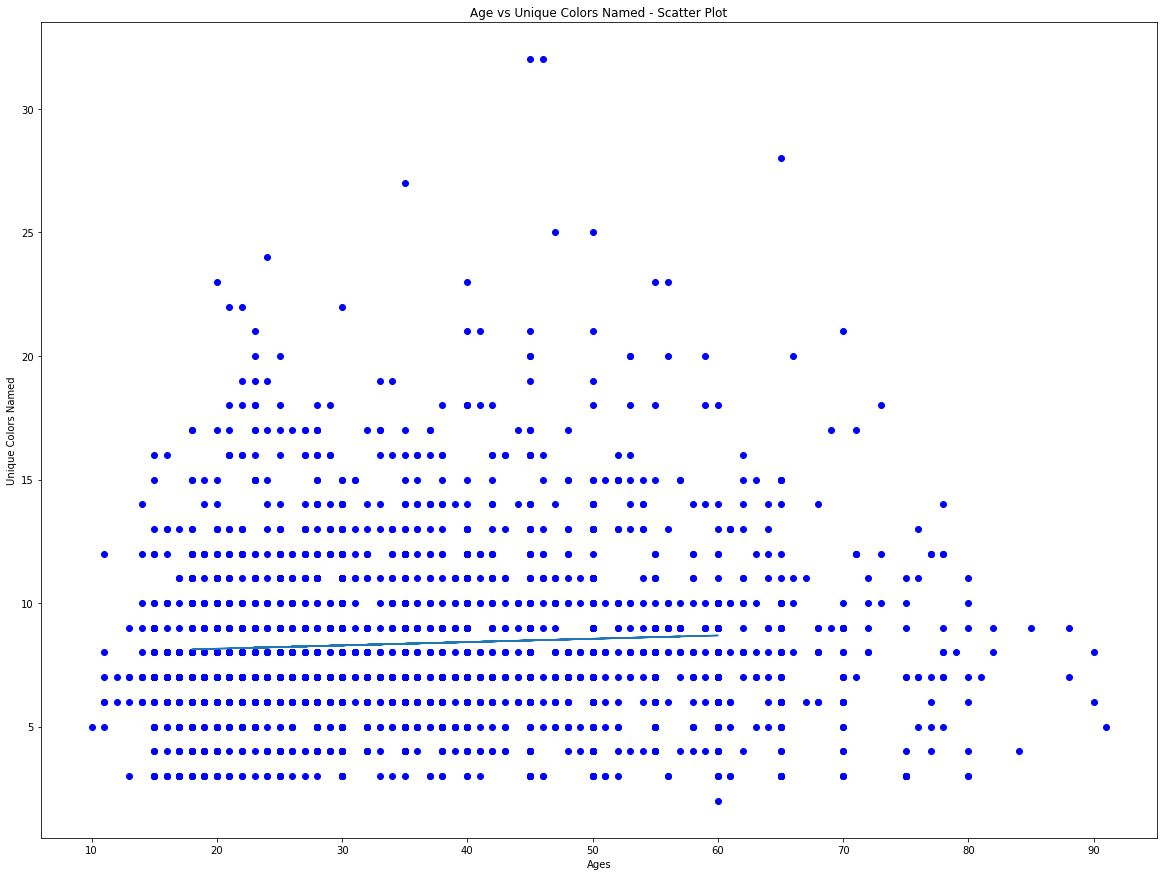

In [167]:
# Creating a new variable with the age column sorted smallest to biggest
age_sorted = clean.sort_values(by=['age'])

# Removing all rows with age < 10 years old cause these are invalid
age_sorted_new = age_sorted[age_sorted['age'] >= 10]

plt.figure(figsize = (20,15))
plt.plot(age_sorted_new['age'], age_sorted_new['unique'], 'bo')
plt.xlabel("Ages")
plt.ylabel("Unique Colors Named")
plt.title("Age vs Unique Colors Named - Scatter Plot")

m, b = np.polyfit(age_sorted_new['age'], age_sorted_new['unique'], 1)
plt.plot(x, m*x + b)

Text(0.5, 1.0, 'Gender vs Unique Colors Named - Scatter Plot')

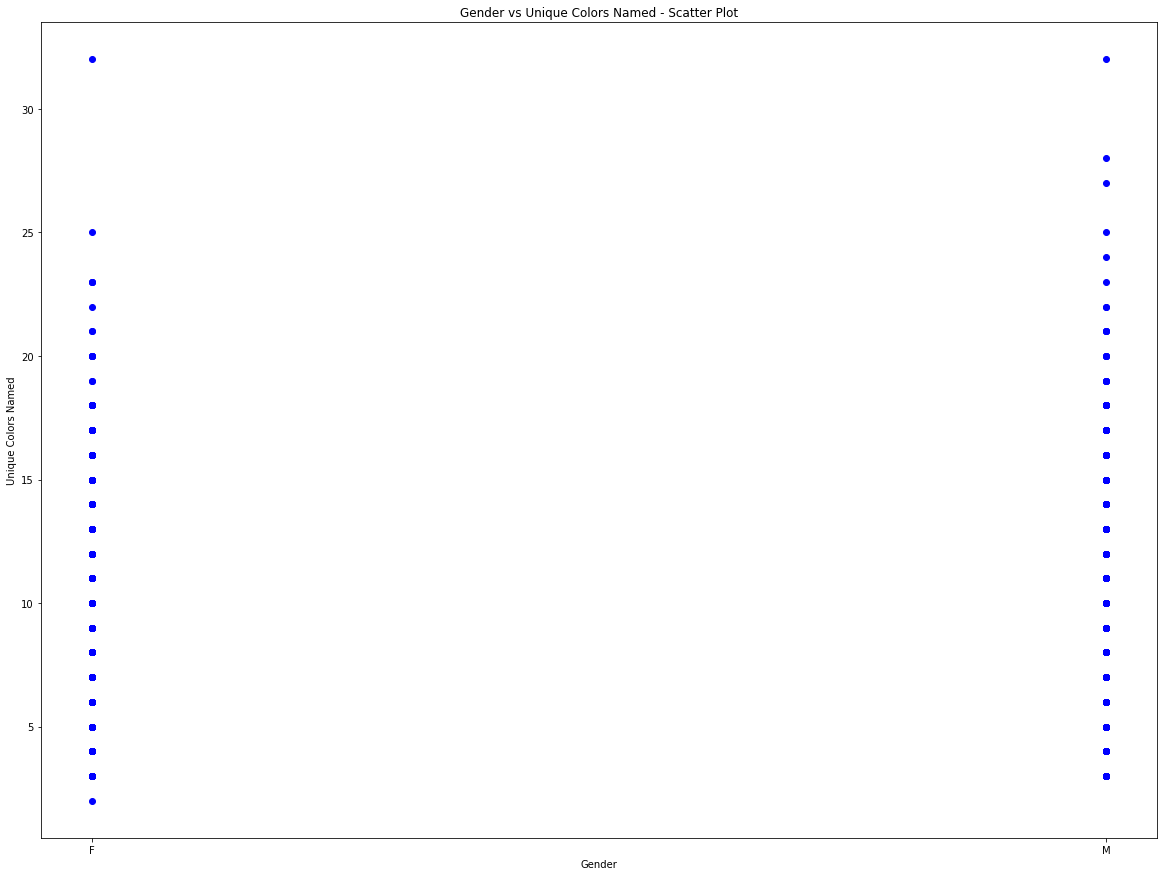

In [168]:
# TODO: gender vs number of unique colour names
plt.figure(figsize = (20,15))
plt.plot(age_sorted_new['gender'], age_sorted_new['unique'], 'bo')
plt.xlabel("Gender")
plt.ylabel("Unique Colors Named")
plt.title("Gender vs Unique Colors Named - Scatter Plot")


Text(0.5, 0, 'Ages')

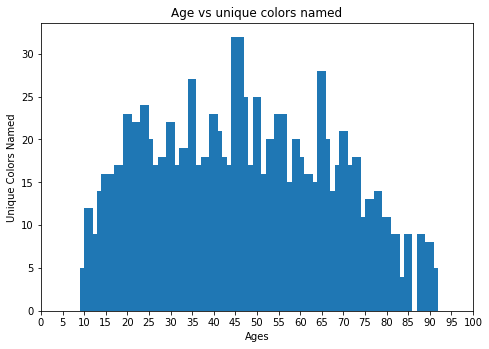

In [169]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(age_sorted_new['age'], age_sorted_new['unique'],width = 2)
ax.set_title('Age vs unique colors named')
ax.set_xticks(np.arange(0,101, 5))
ax.set_ylabel('Unique Colors Named')
ax.set_xlabel('Ages')

### Test Statistics 

We now decide on an arbitary threshold value of age = 30 years. Based on this age, we divide our population into 4 subgroups. 
1) Young Females - Females younger than or equal to 30 <br>
2) Young Males - Males younger than or equal to 30 <br>
3) Old Females - Females older than  30<br>
4) Old Males - Males older than 30<br>

In [170]:
threshold = 30
cleaned_young = clean[(clean['age'] <= threshold)]
cleaned_young_females = cleaned_young[(cleaned_young['gender'] == 'F')]
cleaned_young_males = cleaned_young[(cleaned_young['gender'] == 'M')]

cleaned_old = clean[(clean['age'] > threshold)]
cleaned_old_females = cleaned_old[(cleaned_old['gender'] == 'F')]
cleaned_old_males = cleaned_old[(cleaned_old['gender'] == 'M')]

# Changing gender term for old females from 'F' to 'old_F'
cleaned_old_females['gender'] = 'old_F'

In [171]:
cleaned_old_females

,language,gender,age,gender_age,unique
8,1,old_F,47,"(F, 47)",7
10,1,old_F,40,"(F, 40)",8
15,1,old_F,60,"(F, 60)",7
23,1,old_F,45,"(F, 45)",7
26,2,old_F,40,"(F, 40)",10
...,...,...,...,...,...
2485,104,old_F,76,"(F, 76)",13
2499,105,old_F,50,"(F, 50)",9
2500,105,old_F,40,"(F, 40)",9
2508,105,old_F,40,"(F, 40)",8


<h4> Conducting a two-sample one-tailed t-test </h4>
So we have the Null Hypothesis that young females don't name colors more uniquely compared to older males, older females, and younger males. <br>
So our alternative hypothesis would be that young females name colors more uniquely compared to older males, older females, and younger males.<br>

H0: young females = older males, older females, younger males <br>
H1:  young females > older males, older females, younger males

In [172]:
# threshold analysis
stat1, p1 = stats.ttest_ind(cleaned_young_males['unique'], cleaned_young_females['unique'])
print("t-test result between young males and females. T-stat = ", stat1, " and associated p-value is = ", p1/2)

stat2, p2 = stats.ttest_ind(cleaned_old_males['unique'], cleaned_young_females['unique'])
print("t-test result between old males and young females. T-stat = ", stat2, " and associated p-value is = ", p2/2)

stat3, p3 = stats.ttest_ind(cleaned_old_females['unique'], cleaned_young_females['unique'])
print("t-test result between young females and old females. T-stat = ", stat3, " and associated p-value is = ", p3/2)

t-test result between young males and females. T-stat =  1.149551058414639  and associated p-value is =  0.12528227916925763
t-test result between old males and young females. T-stat =  3.4918040723433768  and associated p-value is =  0.0002483524934351607
t-test result between young females and old females. T-stat =  3.273193938463841  and associated p-value is =  0.0005466369791464684


Above, we see the different values of p for the different group. For each group, we see that the p-value is less than 0.1 and for two groups, we see the p-value is less than 0.05. Therefore we can reject the null - that young females don't name colors more uniquely compared to older males, older females, and younger males - at the 10% significance level for all group  in favor of the alternative - that young females name colors more uniquely compared to older males, older females, and younger males. 
<br>
Additionally, we can also reject the null - that young females don't name colors more uniquely compared to older males, and older females -  at the 5% and 1% level in favor of the alternative - that young females name colors more uniquely compared to older males, and older females.